In [ ]:
import os
import requests
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [ ]:
url = "https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip"
response = requests.get(url)
with open("matlab.zip", "wb") as f:
 f.write(response.content)
with zipfile.ZipFile("matlab.zip", "r") as zip_ref:
 zip_ref.extractall(".")
os.remove("matlab.zip")
# Function to load the EMNIST dataset
def load_emnist(file_path):
 data = loadmat(file_path)
 X = data['dataset'][0][0][0][0][0][0]
 y = data['dataset'][0][0][0][0][0][1]
 X = X.reshape(X.shape[0], 28, 28, 1).transpose([0, 2, 1, 3])
 y = y.reshape(-1)
 return X, y

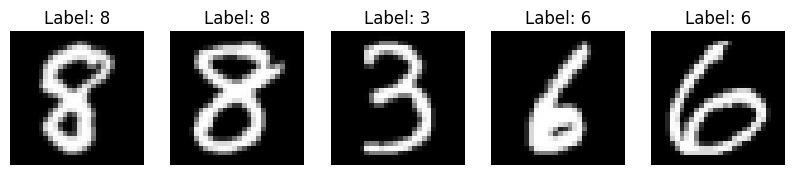

In [24]:

# Load the dataset and split into training and testing sets
X, y = load_emnist("matlab/emnist-digits.mat")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Display some sample images
num_samples = 5
fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
for i in range(num_samples):
 axes[i].imshow(X_train[i+3].reshape(28, 28), cmap="gray")
 axes[i].set_title(f"Label: {y_train[i+3]}")
 axes[i].axis("off")
plt.show()


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (192000, 28, 28, 1)
y_train shape: (192000,)
X_test shape: (48000, 28, 28, 1)
y_test shape: (48000,)


In [ ]:
# Normalize the pixel values
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,
28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
#Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam",
metrics=["accuracy"])

In [ ]:
#Train the model with early stopping
from keras.callbacks import EarlyStopping
import time
early_stopping = EarlyStopping(monitor="val_loss", patience=1, verbose=1)
start_time = time.time()
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1,
validation_split=0.1, callbacks=[early_stopping])
elapsed_time = time.time() - start_time
print("Training time: {:.2f} seconds".format(elapsed_time))


Epoch 1/20
1350/1350 [==============================] - 123s 91ms/step - loss: 0.1608 - accuracy: 0.9512 - val_loss: 0.0390 - val_accuracy: 0.9886
Epoch 2/20
1350/1350 [==============================] - 111s 82ms/step - loss: 0.0584 - accuracy: 0.9829 - val_loss: 0.0314 - val_accuracy: 0.9912
Epoch 3/20
1350/1350 [==============================] - 110s 81ms/step - loss: 0.0451 - accuracy: 0.9867 - val_loss: 0.0268 - val_accuracy: 0.9931
Epoch 4/20
1350/1350 [==============================] - 118s 88ms/step - loss: 0.0380 - accuracy: 0.9891 - val_loss: 0.0262 - val_accuracy: 0.9938
Epoch 5/20
1350/1350 [==============================] - 119s 88ms/step - loss: 0.0332 - accuracy: 0.9904 - val_loss: 0.0254 - val_accuracy: 0.9943
Epoch 6/20
1350/1350 [==============================] - 114s 85ms/step - loss: 0.0302 - accuracy: 0.9913 - val_loss: 0.0236 - val_accuracy: 0.9945
Epoch 7/20
1350/1350 [==============================] - 113s 84ms/step - loss: 0.0268 - accuracy: 0.9921 - val_loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

1500/1500 [==============================] - 15s 10ms/step - loss: 0.0237 - accuracy: 0.9937
Test loss: 0.023662284016609192, Test accuracy: 0.9936875104904175


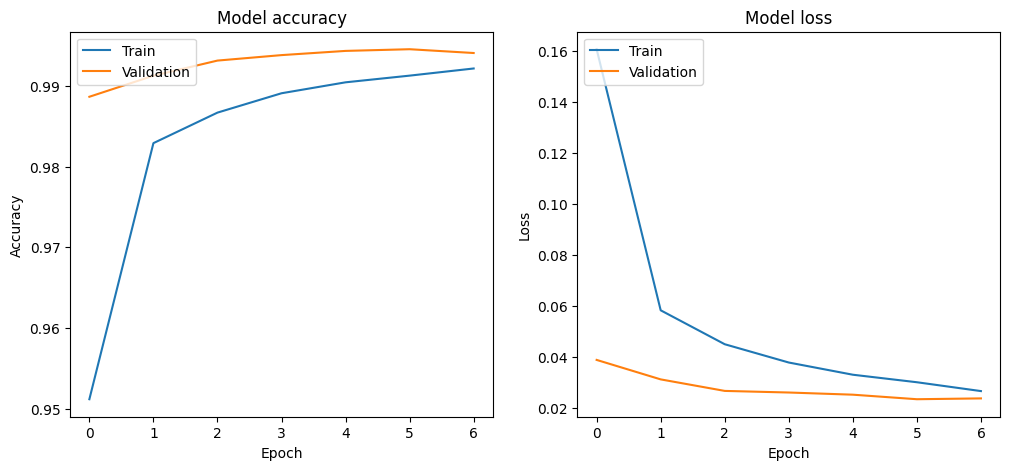

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
##LOAD AND SAVE MODEL
import pickle
model.save("emnist_digits_model.h5")


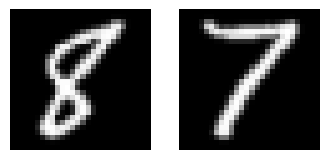

In [ ]:
#Load the saved model
from keras.models import load_model
model = load_model("emnist_digits_model.h5")
#Select 2 random instances from the test set and display them
num_samples = 2
random_indices = np.random.choice(X_test.shape[0], size=num_samples,
replace=False)
# Plot the images
fig, axes = plt.subplots(1, num_samples, figsize=(4, 2))
for i, idx in enumerate(random_indices):
 axes[i].imshow(X_test[idx].reshape(28, 28), cmap='gray')
 axes[i].axis('off')
plt.show()

In [ ]:
selected_images = X_test[random_indices]
# Make predictions on preprocessed test images
predictions = model.predict(selected_images)
# Get the predicted class for each instance
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted classes:", predicted_classes)

1/1 [==============================] - 0s 100ms/step
Predicted classes: [8 7]
